# COURSE WORK: PYTHON PROGRAMMIG FOR DATA SCIENCE

## AI Humanitarian Monitoring and Evaluation for Predictive Analytics Framework
### Predicting Program Effectiveness using Secondary Data
**Author:** Wandiya Dominic

**ID:** MSc/DSA/24/0742

**Course lecturer:** professor E.J GARBA

**Institution:** Modibbo Adama University  

---

## 📖 Introduction
Monitoring and Evaluation (M&E) in humanitarian programs is traditionally descriptive, focusing on what has already happened.  
This course work aims to integrate Artificial Intelligence (AI) into M&E to **predict program effectiveness** using secondary data (CSV/Excel).  

The end-users are NGOs who can use predictive insights for:  
- Better resource allocation  
- Early detection of underperforming programs  
- Data-driven decision making  

---

## 🎯 Objectives
1. To preprocess and clean humanitarian program datasets.  
2. To build a Machine Learning (ML) model that predicts program effectiveness.  
3. To visualize the data **before and after cleaning**.  
4. To evaluate model performance and interpret feature importance.  
5. To provide decision support through predictions and visual dashboards.  

---

## 📊 Methodology
The methodology follows these steps:  
1. **Data Loading & Exploration**  
2. **Pre-cleaning Visualization**  
3. **Data Cleaning & Feature Engineering**  
4. **Post-cleaning Visualization**  
5. **Model Training & Prediction (Random Forest)**  
6. **Evaluation (Confusion Matrix, Classification Report)**  
7. **Visualization of Results**  
8. **Prediction on New Program Data**

---


In [5]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


## 2. Data Loading & Exploration
We use a **CSV/Excel dataset** representing humanitarian programs.  
Columns may include:
- Program_Type (categorical: Health, Education, WASH, etc.)
- Budget (numeric)
- Beneficiaries_Target (numeric)
- Beneficiaries_Reached (numeric)
- Context_Score (numeric: captures local context, e.g., 1–10)
- Outcome_Achieved (binary or percentage)

We will first examine the raw data.


Let's load the data and explore its structure. I'm mounting Google Drive to access the dataset.

In [1]:
# Mounting google drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# Change directory to your thesis folder on Google Drive
# Replace 'wandiya-thesis' with the actual path to your folder if different
os.chdir('/content/drive/MyDrive/wandiya-thesis')
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/wandiya-thesis


In [4]:
# Load dataset (replace with actual filename)
df = pd.read_csv("program_data.csv")

# Preview first 10 rows
df.head(10)


,Program_Type,Budget,Beneficiaries_Target,Beneficiaries_Reached,Context_Score
0,WASH,23284,923,2026,7
1,Health,82789,1028,1346,4
2,Health,94664,233,175,8
3,Food Security,71389,2205,4682,5
4,WASH,19435,3727,3646,7
5,Livelihoods,64340,4880,3333,10
6,WASH,54078,1952,1653,3
7,Food Security,88832,4275,116,7
8,Food Security,61293,3033,282,8
9,WASH,88781,3384,2206,5


## 3. Pre-Cleaning Visualization
Before cleaning, we inspect:
1. **Missing Values Heatmap**
2. **Feature Distributions**


Data shape before cleaning: (200, 5)


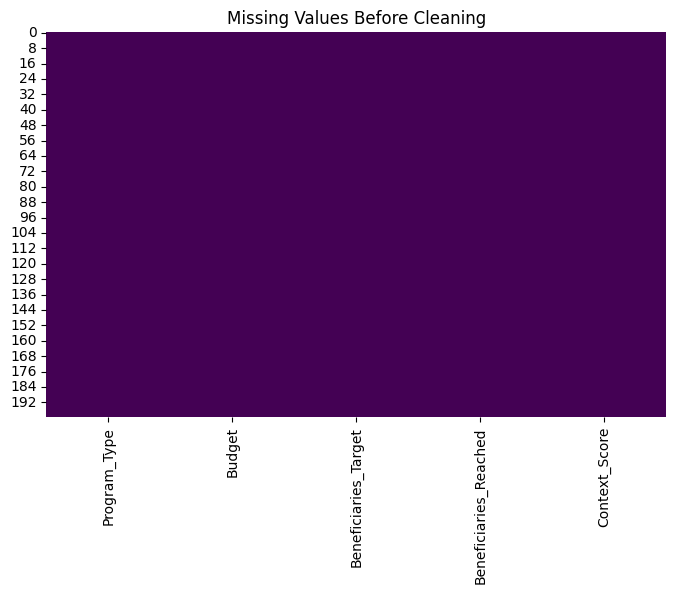

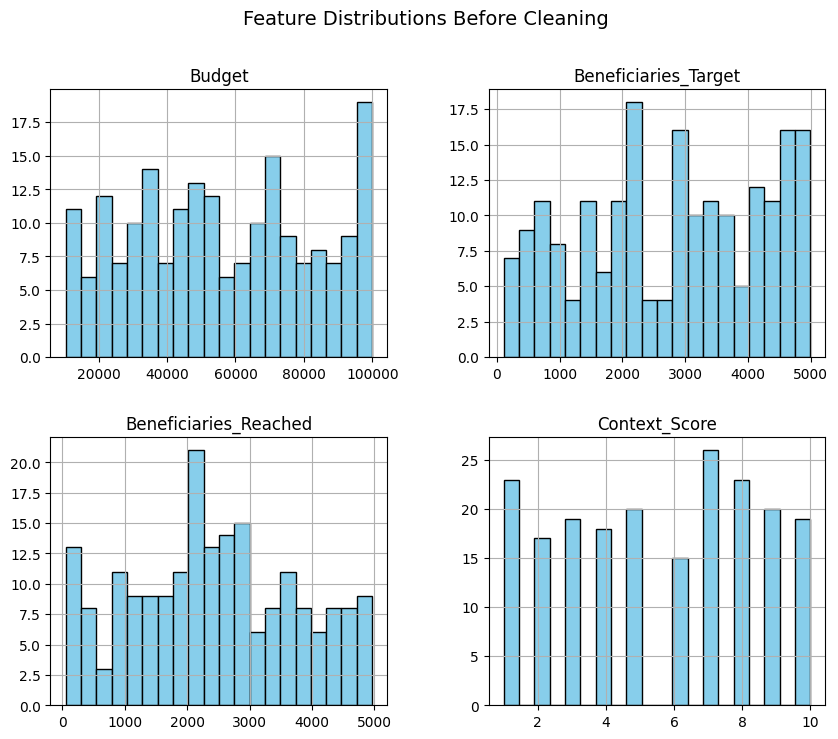

In [ ]:
print("Data shape before cleaning:", df.shape)

# Missing values heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Before Cleaning")
plt.show()

# Feature distributions
df.hist(figsize=(10,8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions Before Cleaning", fontsize=14)
plt.show()


## 4. Data Cleaning & Feature Engineering
Steps:  
1. Drop rows with missing values (other strategies: imputation).  
2. Define effectiveness (≥80% of target beneficiaries reached = Effective).  
3. Encode categorical variables.  
4. Standardize numeric features.


In [ ]:
# Drop missing values
df.dropna(inplace=True)
print("Data shape after cleaning:", df.shape)

# Define Effectiveness target variable
df["Effectiveness"] = np.where(
    (df["Beneficiaries_Reached"] / df["Beneficiaries_Target"]) >= 0.8, 1, 0
)

# Encode categorical feature
le = LabelEncoder()
df["Program_Type"] = le.fit_transform(df["Program_Type"])

# Select Features and Target
X = df[["Program_Type", "Budget", "Beneficiaries_Target",
        "Beneficiaries_Reached", "Context_Score"]]
y = df["Effectiveness"]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Data shape after cleaning: (200, 5)


## 5. Post-Cleaning Visualization
We confirm the dataset after cleaning with:
- Missing value heatmap
- Feature distributions


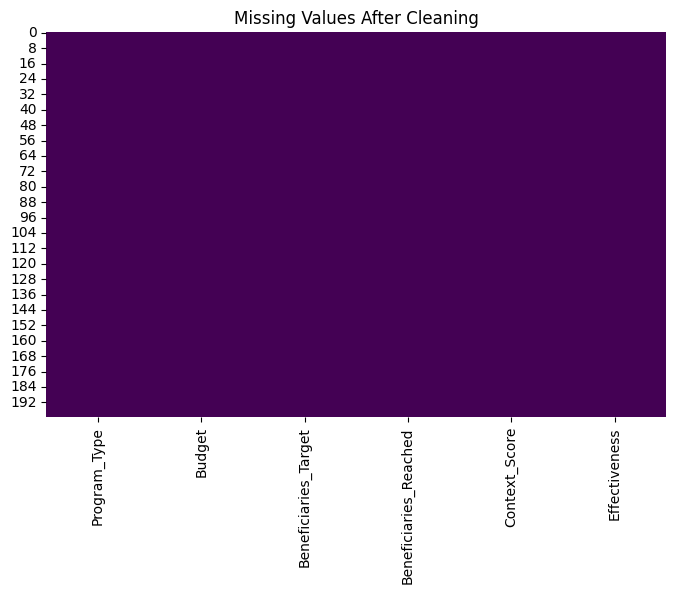

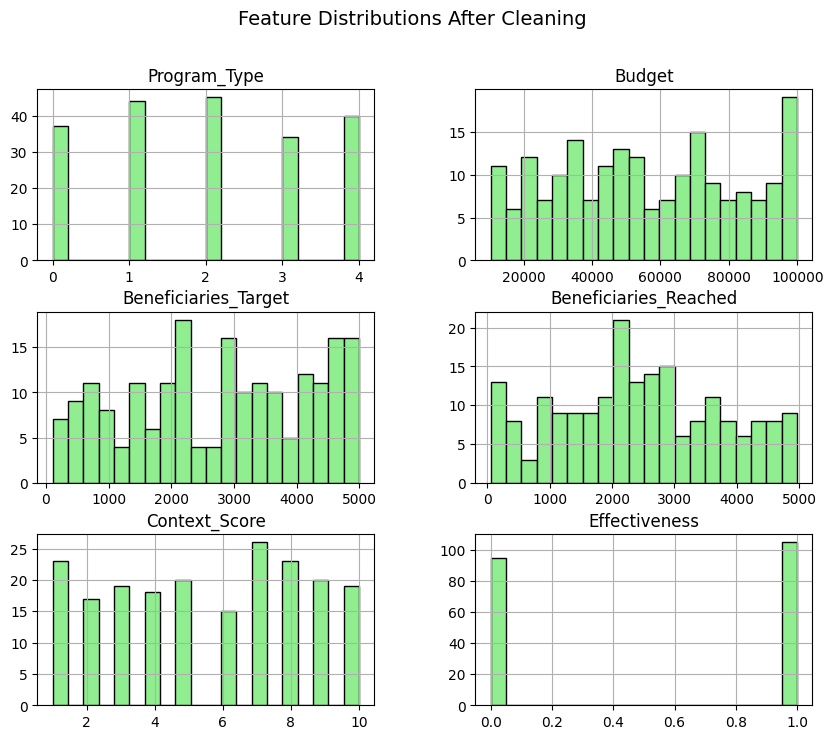

In [ ]:
# Missing values heatmap after cleaning
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values After Cleaning")
plt.show()

# Feature distributions after cleaning
df.hist(figsize=(10,8), bins=20, color="lightgreen", edgecolor="black")
plt.suptitle("Feature Distributions After Cleaning", fontsize=14)
plt.show()


## 6. Model Training
We split the dataset into **training (70%)** and **testing (30%)**.  
We use a **Random Forest Classifier** due to its robustness in handling categorical and numeric data.


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# viewing the pred.
print(y_pred)


[1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0]


## 7. Model Evaluation
We use:
- Classification Report (Accuracy, Precision, Recall, F1-score)
- Confusion Matrix (visualized)



Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        34
           1       0.89      0.92      0.91        26

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



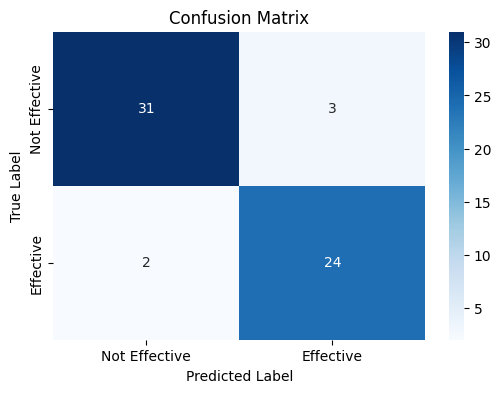

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Effective","Effective"],
            yticklabels=["Not Effective","Effective"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


## 8. Feature Importance
Feature importance explains which variables most influence program effectiveness.  


/tmp/ipython-input-3033111794.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


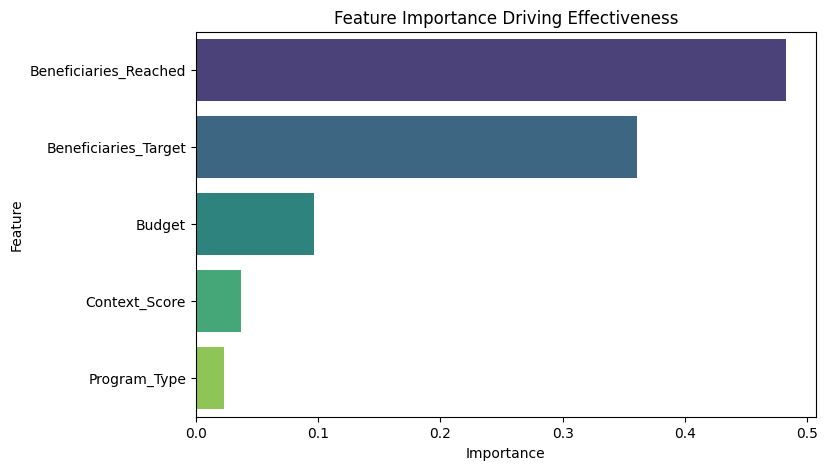

In [ ]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display
feature_importance

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance Driving Effectiveness")
plt.show()


## 9. Prediction on New Program
We test the model on hypothetical new program data.



Predicted Effectiveness: Effective
Prediction Probability: 57.0 %


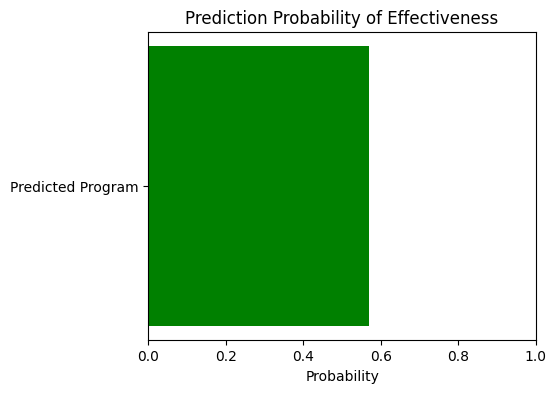

In [ ]:
# Example new program

new_program = pd.DataFrame([{
    "Program_Type": le.transform(["Health"])[0],
    "Budget": 50000,
    "Beneficiaries_Target": 1000,
    "Beneficiaries_Reached": 750,
    "Context_Score": 6
}])

# Encode categorical feature in new_program
#new_program["Program_Type"] = le.transform(new_program["Program_Type"])

# Scale and predict
new_program_scaled = scaler.transform(new_program)
prediction = model.predict(new_program_scaled)
probability = model.predict_proba(new_program_scaled)[0][1]

print("\nPredicted Effectiveness:", "Effective" if prediction[0] == 1 else "Not Effective")
print("Prediction Probability:", round(probability*100, 2), "%")

# Visualization
plt.figure(figsize=(5,4))
plt.barh(["Predicted Program"], [probability],
         color="green" if prediction[0]==1 else "red")
plt.xlim(0,1)
plt.title("Prediction Probability of Effectiveness")
plt.xlabel("Probability")
plt.show()


Predicted Effectiveness: Effective
Prediction Probability: 57.0 %


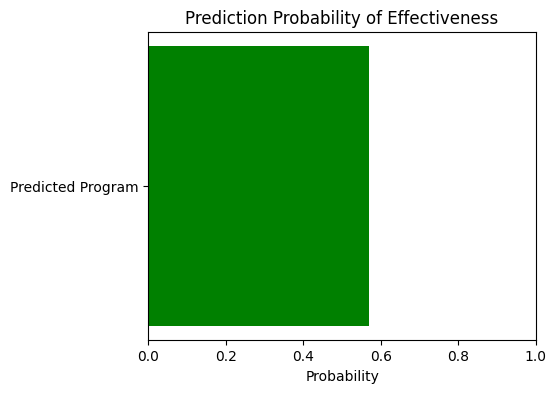

In [ ]:
# Example new program

new_program = pd.read_csv("hypothetical_program_data.csv")
new_program.head()

# new_program = pd.DataFrame([{
#     "Program_Type": le.transform(["Health"])[0],
#     "Budget": 50000,
#     "Beneficiaries_Target": 1000,
#     "Beneficiaries_Reached": 750,
#     "Context_Score": 6
# }])

# Encode categorical feature in new_program
new_program["Program_Type"] = le.transform(new_program["Program_Type"])

# Scale and predict
new_program_scaled = scaler.transform(new_program)
prediction = model.predict(new_program_scaled)
probability = model.predict_proba(new_program_scaled)[0][1]

print("\nPredicted Effectiveness:", "Effective" if prediction[0] == 1 else "Not Effective")
print("Prediction Probability:", round(probability*100, 2), "%")

# Visualization
plt.figure(figsize=(5,4))
plt.barh(["Predicted Program"], [probability],
         color="green" if prediction[0]==1 else "red")
plt.xlim(0,1)
plt.title("Prediction Probability of Effectiveness")
plt.xlabel("Probability")
plt.show()

## 📌 Discussion
The Random Forest model provides predictive insights into program effectiveness.  
Key findings:
- Feature importance reveals which factors (e.g., Budget, Context Score, Program Type) most influence outcomes.
- Pre/post cleaning visualizations highlight the importance of data quality.
- The model can guide NGOs in decision-making, resource allocation, and adaptive programming.

## ✅ Conclusion
This course work demonstrates that **AI-enhanced M&E** can shift humanitarian monitoring from descriptive reporting to **predictive analytics**.  
The framework built here provides NGOs with a tool for forecasting program success and identifying at-risk interventions.

---

## 📚 Future Work
1. Test other ML models (XGBoost, Neural Networks).  
2. Apply Explainable AI (SHAP, LIME) for deeper insights.  
3. Deploy as an interactive NGO dashboard (Streamlit).  
